# Technical Analysis with Pandas ([pandas_ta](https://github.com/twopirllc/pandas-ta))

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas_ta as ta
from alphaVantageAPI.alphavantage import AlphaVantage  # pip install alphaVantage-api
e = pd.DataFrame()

### Help on Indicators (post an [issue](https://github.com/twopirllc/pandas-ta/issues) if the indicator doc needs updating)

In [2]:
e.ta.indicators()

pandas.ta - Technical Analysis Indicators
Total Indicators: 78
Abbreviations:
    accbands, ad, adosc, adx, ao, apo, aroon, atr, bbands, bop, cci, cmf, cmo, coppock, cross, decreasing, dema, donchian, dpo, efi, ema, eom, fwma, hl2, hlc3, hma, ichimoku, increasing, kc, kst, kurtosis, linreg, log_return, macd, mad, massi, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, percent_return, ppo, pvi, pvol, pvt, pwma, qstick, quantile, rma, roc, rsi, skew, sma, stdev, stoch, swma, t3, tema, trend_return, trima, trix, true_range, tsi, uo, variance, vortex, vp, vwap, vwma, willr, wma, zlma, zscore


In [3]:
# Individual Indicator help
help(ta.accbands)

Help on function accbands in module pandas_ta.volatility:

accbands(high, low, close, length=None, c=None, drift=None, mamode=None, offset=None, **kwargs)
    Acceleration Bands (ACCBANDS)
    
    Acceleration Bands created by Price Headley plots upper and lower envelope
    bands around a simple moving average.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/acceleration-bands-abands/
    
    Calculation:
        Default Inputs:
            length=10, c=4
        EMA = Exponential Moving Average
        SMA = Simple Moving Average
        HL_RATIO = c * (high - low) / (high + low)
        LOW = low * (1 - HL_RATIO)
        HIGH = high * (1 + HL_RATIO)
    
        if 'ema':
            LOWER = EMA(LOW, length)
            MID = EMA(close, length)
            UPPER = EMA(HIGH, length)
        else:
            LOWER = SMA(LOW, length)
            MID = SMA(close, length)
            UPPER = SMA(HIGH, length)
    
    Args:
  

### Load Daily EUR.USD from [AlphaVantage](http://www.alphavantage.com) and clean it up a little

In [4]:
ffx = 'USD'
tfx = 'EUR'
AV = AlphaVantage(premium=False, clean=True, output_size='full')
df = AV.fx(from_currency=ffx, to_currency=tfx, function='FXD') # Daily
df.name = f"{tfx}.{ffx}"
df.set_index(['date'], inplace=True)

In [5]:
last_ = 200
# last_ = df.shape[0]  # Uncomment to show more data
print(f"{df.name}{df.shape}")
df.head()

EUR.USD(5001, 4)


,open,high,low,close
date,,,,
2001-01-19,0.9439,0.9503,0.9332,0.9338
2001-01-22,0.9348,0.9397,0.9267,0.9380
2001-01-23,0.9378,0.9450,0.9366,0.9387
2001-01-24,0.9390,0.9395,0.9211,0.9225
2001-01-25,0.9233,0.9244,0.9113,0.9210


## Create some constants for some indicators

In [6]:
df.ta.constants(True, -4, 4) # Use help(df.ta.constants) for more info
df.head()

,open,high,low,close,-4,-3,-2,-1,0,1,2,3,4
date,,,,,,,,,,,,,
2001-01-19,0.9439,0.9503,0.9332,0.9338,-4,-3,-2,-1,0,1,2,3,4
2001-01-22,0.9348,0.9397,0.9267,0.9380,-4,-3,-2,-1,0,1,2,3,4
2001-01-23,0.9378,0.9450,0.9366,0.9387,-4,-3,-2,-1,0,1,2,3,4
2001-01-24,0.9390,0.9395,0.9211,0.9225,-4,-3,-2,-1,0,1,2,3,4
2001-01-25,0.9233,0.9244,0.9113,0.9210,-4,-3,-2,-1,0,1,2,3,4


## Price Chart with Moving Averages

In [7]:
def machart(kind, fast, medium, slow, append=True, last=last_):
    ma1 = df.ta(kind=kind, length=fast, append=append)
    ma2 = df.ta(kind=kind, length=medium, append=append)
    ma3 = df.ta(kind=kind, length=slow, append=append)
    title = f"{df.name}: {kind.upper()}s from {df.index[0]} to {df.index[-1]}"
    pricedf = df[['close', ma1.name, ma2.name, ma3.name]]
    pricedf.tail(last).plot(figsize=(16,8), color=['black', 'green', 'orange', 'red'], title=title)

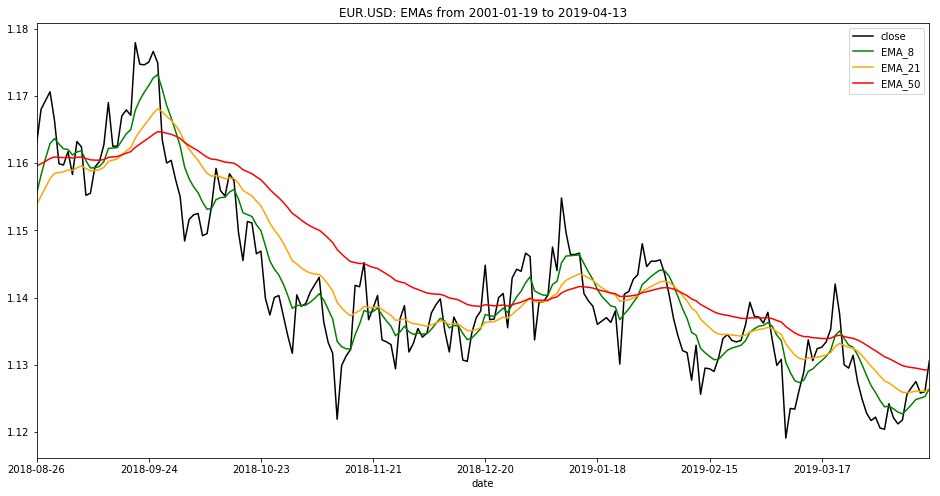

In [8]:
machart('ema', 8, 21, 50)

## Indicator Examples
* Examples of simple and complex indicators.  Most indicators return a Series, while a few return DataFrames.
* All indicators can be called one of three ways. Either way, they return the result.

### Three ways to use pandas_ta
1. Stand Alone like TA-Lib  ta.**indicator**(*kwargs*).
2. As a DataFrame Extension like df.ta.**indicator**(*kwargs*).  Where df is a DataFrame with columns named 'open', 'high', 'low', 'close, 'volume' for simplicity.
3. Similar to #2, but by calling: df.ta(kind='**indicator**', *kwargs*).

### Cumulative Log Return

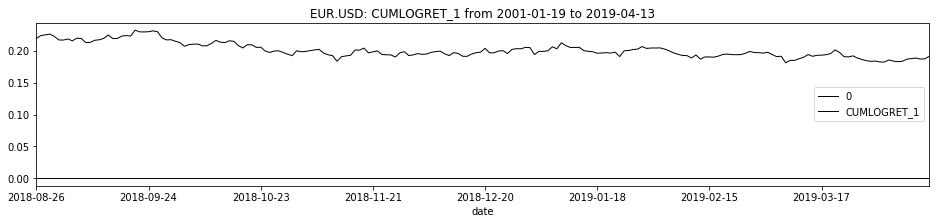

In [9]:
clr = df.ta.log_return(cumulative=True, append=True)
df[['0', f"{clr.name}"]].tail(last_).plot(figsize=(16, 3), color=['black'], linewidth=1, title=f"{df.name}: {clr.name} from {df.index[0]} to {df.index[-1]}")

### MACD

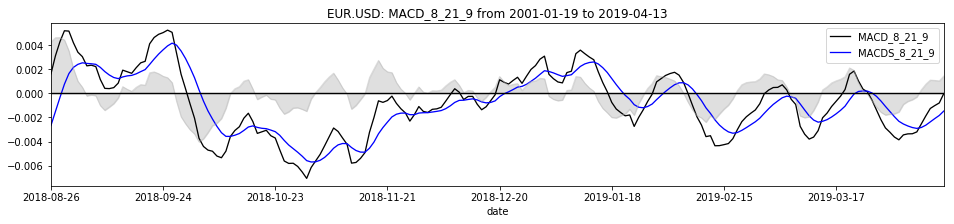

In [18]:
macddf = df.ta.macd(fast=8, slow=21, signal=9, min_periods=None, append=True)
macddf[[macddf.columns[0], macddf.columns[2]]].tail(last_).plot(figsize=(16, 3), color=['black', 'blue'], linewidth=1.3)
macddf[macddf.columns[1]].tail(last_).plot.area(figsize=(16, 3), stacked=False, color=['silver'], linewidth=1, title=f"{df.name}: {macddf.name} from {df.index[0]} to {df.index[-1]}")
df['0'].tail(last_).plot(figsize=(16, 3), color=['black'], linewidth=1.4)

### ZScore

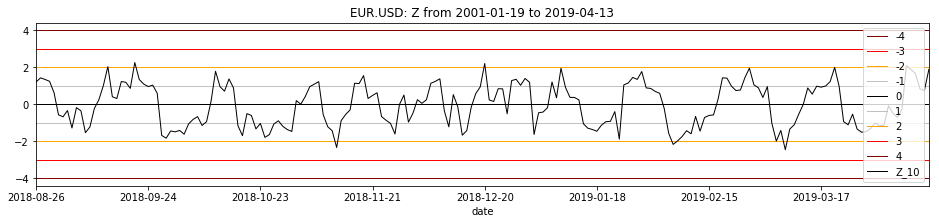

In [11]:
df.ta.zscore(length=10, append=True)
zcolors = ['maroon', 'red', 'orange', 'silver', 'black', 'silver', 'orange', 'red', 'maroon', 'black', 'blue']
df[['-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', 'Z_10']].tail(last_).plot(figsize=(16, 3), color=zcolors, linewidth=1, title=f"{df.name}: Z from {df.index[0]} to {df.index[-1]}")

# New Features

### Cross
Cross (__cross__) returns 1 if two series cross and 0 if they do not.  By default, above=True.

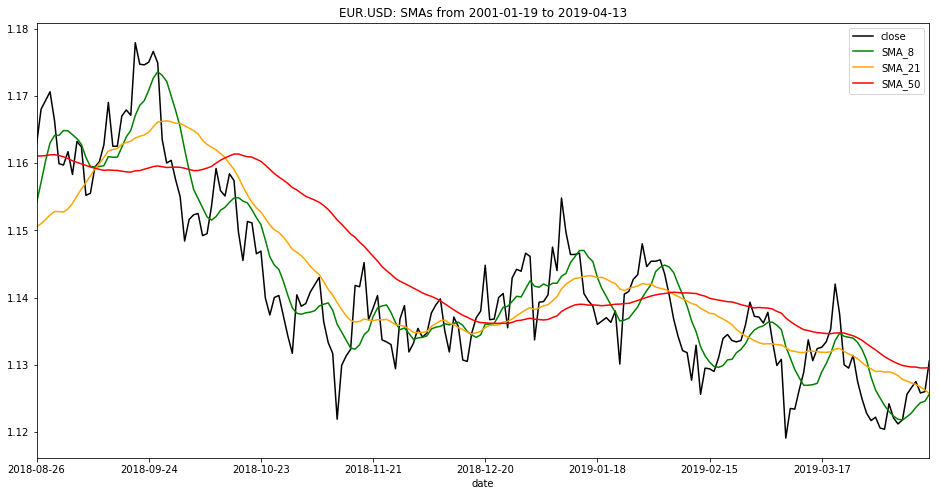

In [12]:
machart('sma', 8, 21, 50, last=last_)

Most recent Cross Above Dates:
  2019-04-13, 2019-04-10, 2019-03-25, 2019-03-15, 2019-03-13


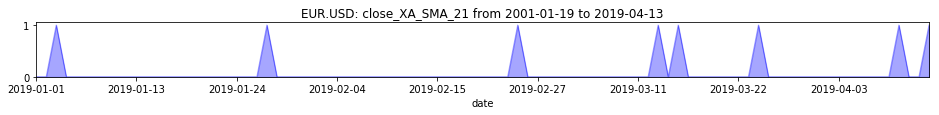

In [13]:
maf = df.ta(kind='sma', length=21)
cross_above = ta.cross(df['close'], maf, above=True)
cross_above.tail(90).plot.area(figsize=(16, 1), color=['blue'], linewidth=1, alpha=0.35, stacked=False, title=f"{df.name}: {cross_above.name} from {df.index[0]} to {df.index[-1]}")
print(f"Most recent Cross Above Dates:\n  {', '.join(list(cross_above[cross_above > 0].tail(5).index[::-1]))}")

Most recent Cross Below Dates:
  2019-04-11, 2019-03-26, 2019-03-22, 2019-03-14, 2019-03-05


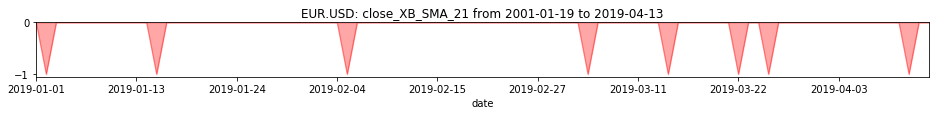

In [14]:
cross_below = -1 * ta.cross(df['close'], maf, above=False)
cross_below.tail(90).plot.area(figsize=(16, 1), color=['red'], linewidth=1, alpha=0.35, stacked=False, title=f"{df.name}: {cross_below.name} from {df.index[0]} to {df.index[-1]}")
print(f"Most recent Cross Below Dates:\n  {', '.join(list(cross_below[cross_below < 0].tail(5).index[::-1]))}")

### Trend Return
* Trend Return (__trend_return__) calculates the cumulative log returns from a specified trend.
* There is no limit on how to construct a trend.  It can be as simple as: close > SMA(close, 50).

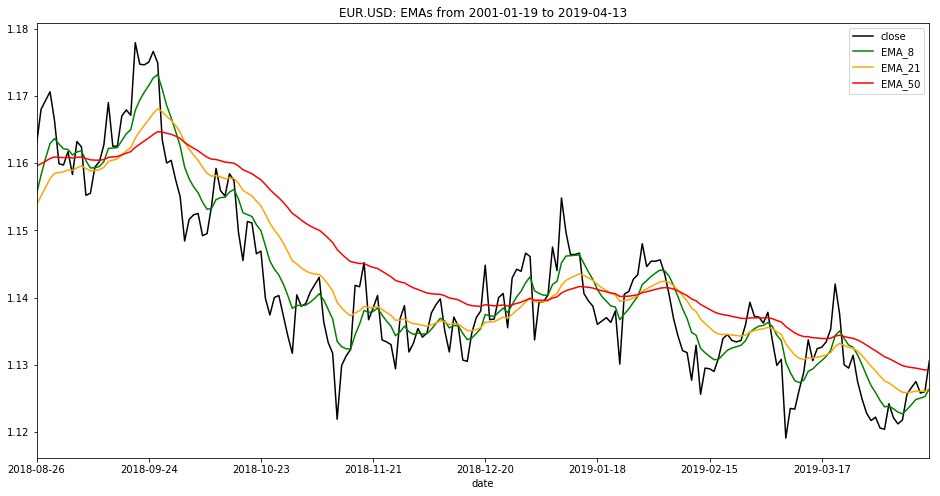

In [15]:
machart('ema', 8, 21, 50, last=last_)

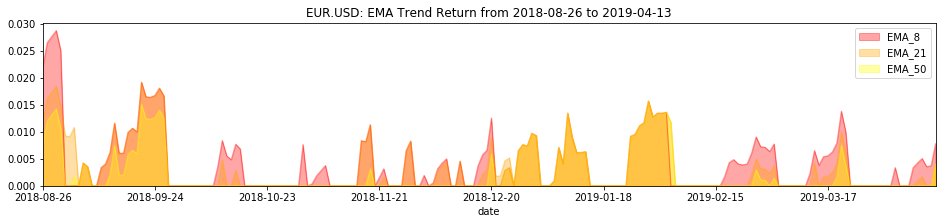

In [16]:
def ma_strategy(kind, fast, medium, slow, cumulative=True, variable=False, last=last_):
    """A very basic analysis of the closing price being greater than each moving average"""
    last = last if last is not None else df.shape[0]
    closedf = df['close']
    maf = df.ta(kind=kind, length=fast)
    mam = df.ta(kind=kind, length=medium)
    mas = df.ta(kind=kind, length=slow)
    tdf = pd.DataFrame({
        maf.name: ta.trend_return(closedf, closedf > maf, cumulative=cumulative, variable=variable),
        mam.name: ta.trend_return(closedf, closedf > mam, cumulative=cumulative, variable=variable),
        mas.name: ta.trend_return(closedf, closedf > mas, cumulative=cumulative, variable=variable),
    })
    tdf.set_index(closedf.index, inplace=True)
    window = tdf.tail(last)
    title = f"{df.name}: {kind.upper()} Trend Return from {window.index[0]} to {window.index[-1]}"
    window.plot.area(figsize=(16, 3), color=['red', 'orange', 'yellow'], linewidth=1, alpha=0.35, title=title, stacked=False)

ma_strategy('ema', 8, 21, 50, last=last_)